# Sentiment Analysis with Spacy
### Author: Ehsan Gharib-Nezhad

#### What is Sentiment Analysis?
- Sentiment Analysis is the process of computationally determining whether a piece of text is positive, negative or neutral.

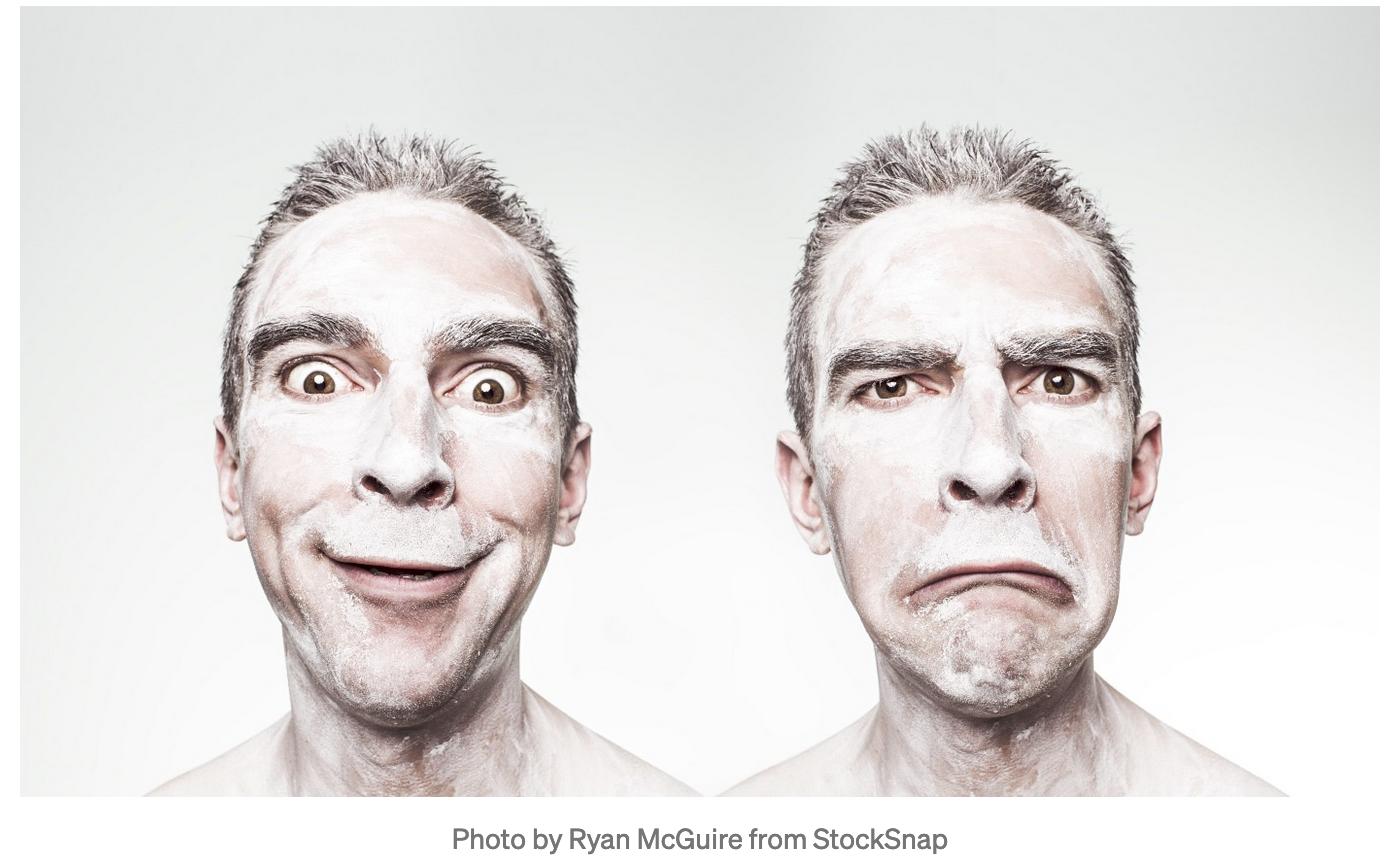

# spaCy Basics

### What is spaCy?

**spaCy** (https://spacy.io/) is a **free**, **open-source library** for advanced **Natural Language Processing** (NLP) in Python.

If you’re working with a lot of text, you’ll eventually want to know more about it. For example, what’s it about? What do the words mean in context? Who is doing what to whom? What companies and products are mentioned? Which texts are similar to each other?

spaCy is designed specifically for **production use** and helps you build applications that process and “understand” large volumes of text. It can be used to build **information extraction** or **natural language understanding** systems, or to pre-process text for **deep learning**.

In this section we'll install and setup spaCy to work with Python, and then introduce some concepts related to Natural Language Processing.

### What spaCy is not...

**spaCy is not a platform or “an API”**. Unlike a platform, spaCy does not provide a software as a service, or a web application. It’s an open-source library designed to help you build NLP applications, not a consumable service.

**spaCy is not an out-of-the-box chat bot engine**. While spaCy can be used to power conversational applications, it’s not designed specifically for chat bots, and only provides the underlying text processing capabilities.

**spaCy is not research software**. It’s built on the latest research, but it’s designed to get things done. This leads to fairly different design decisions than **NLTK** or **CoreNLP**, which were created as platforms for teaching and research. The main difference is that spaCy is integrated and opinionated. spaCy tries to avoid asking the user to choose between multiple algorithms that deliver equivalent functionality. Keeping the menu small lets spaCy deliver generally better performance and developer experience.

**spaCy is not a company**. It’s an open-source library. The company publishing spaCy and other software is called [Explosion AI](https://explosion.ai/about).

In [1]:
from myfunctions import *

In [2]:
df = pd.read_csv('../datasets/text_processed_all_posts_combined_imbalanced.csv',index_col=0)

## Create corpus

In [3]:
#convert to a list of strings:

corpus = list(df['post'])

corpus[:10]

['tested positive hope every single one feels better soon',
 'idea got coronavirus cold etc got runny nose coughing quite lot bit headache want go case give people symptoms debilitating',
 'idea got coronavirus cold etc got runny nose coughing quite lot bit headache want go case give people symptoms feel practically normal cold flu last night eyes hurt bit able sleep symptoms debilitating',
 'live canadian province presumed cases related travel travelled outside city contact anyone known case covid however days ago interacting someone travelled us travelling international airports f feel like experiencing shortness breath unsure never felt way felt slight pressure tightness right side chest feel like get much air lungs usual pains sharp feelings yet fever cough headache symptom read stories people symptoms seem start least fever cough shortness breath sure freakin',
 'yesterday woke noticed shortness breath hours waking work went home early felt weak tired morning feel weak anymore sti

# Sentiment Analysis with Textblob

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [4]:
from textblob import TextBlob
for aspect in df['post'].iloc[0:10]:
    aspect = TextBlob(aspect).sentiment
print(aspect)

Sentiment(polarity=0.0, subjectivity=0.0)


In [5]:
df[['sent_textblob_polarity','sent_textblob_subjectivity']] = [TextBlob(sen).sentiment for sen in corpus]

In [6]:
df[['post','is_Covid19positive','sent_textblob_polarity','sent_textblob_subjectivity']]

,post,is_Covid19positive,sent_textblob_polarity,sent_textblob_subjectivity
0,tested positive hope every single one feels better soon,1,0.218615,0.419913
1,idea got coronavirus cold etc got runny nose coughing quite lot bit headache want go case give people symptoms debilitating,1,-0.600000,1.000000
2,idea got coronavirus cold etc got runny nose coughing quite lot bit headache want go case give people symptoms feel practically normal cold flu last night eyes hurt bit able sleep symptoms debilitating,1,-0.110000,0.668333
3,live canadian province presumed cases related travel travelled outside city contact anyone known case covid however days ago interacting someone travelled us travelling international airports f feel like experiencing shortness breath unsure never felt way felt slight pressure tightness right side chest feel like get much air lungs usual pains sharp feelings yet fever cough headache symptom rea...,1,0.025492,0.376479
4,yesterday woke noticed shortness breath hours waking work went home early felt weak tired morning feel weak anymore still shortness breath slight chest pain could allergies symptoms called doctors test unless cough fever shortness breath cough fever,1,-0.243333,0.483333
...,...,...,...,...
33100,right days food prepped people calories sure get got supplies things nothing critical need anymore sure days per person partner enough get many days food prepping person,0,0.297619,0.685582
33101,even avoid non essential travel sure people might still need fly long distances various obligations guides tips exactly one going security check sitting plane instance sanitize plane seat advice would appreciated,0,0.242857,0.476984
33102,many people expecting power outages water contamination loss water covid pandemic honest question like understand people reasoning maybe overlooking something important keep hearing people say ready coming power outages seeing online following news individual reports hard hit areas quarantined areas appear shut power plants water treatment plants appear disruptions sars even ebola hit areas es...,0,0.125694,0.600694
33103,husband er rn years also type diabetic since course year marriage subject pandemic come several times created master list needs years purchased big items last month refreshed supply old items still banging heads important subject solar mini fridge insulin lose power feel dumb overwhelmed try understand need house root cellar giant generator apartment dwellers second floor yard ability mount so...,0,0.049242,0.407576


# Investigating polarities:

#### Looking at positive and negative text for Real Disasters

In [7]:
df['is_Covid19positive'].value_counts()

1    30764
0     2341
Name: is_Covid19positive, dtype: int64

### top positive posts from  is_Covid19positive

In [8]:
df[df['is_Covid19positive']==1].sort_values(by = 'sent_textblob_polarity', ascending = False)[['sent_textblob_polarity','post']].head(10)

,sent_textblob_polarity,post
16665,1.0,best supplements take also heard pepcid helps well thank feeling scared
21081,1.0,found works best breathing issues
2802,1.0,post viral syndrome video excellent information suffering symptoms weeks even months virus alone
23734,1.0,supplements yall take whats best brands please help
9064,1.0,dad diagnosed covid today best calculate risk hospitalization death based age sex risk factors
20733,1.0,hello guys think vaccine best opinion pfizer one family members vaccine doses months feel like everyone get vaccinated pfizer end corona heard pfizer lasts year need get doses
11130,1.0,need wear mask taking shower prevent droplets contaminating water mandatory person assigned covid protection officer watch even taking shower sleeping whats best remember obey complacent
26260,1.0,please let everyone best bodies best try get also stop spreading information vaccine prevent transmission vaxxed people still wearing mask distancing
24963,1.0,got vaccinated covid biontech yesterday day sore throat research sore throat seem side effect vaccine anybody else experience happen catch covid perfect timing cannot swallow
5472,1.0,greatest worry


### top positive posts from  PandemicPreps

In [9]:
df[df['is_Covid19positive']==0].sort_values(by = 'sent_textblob_polarity', ascending = False)[['sent_textblob_polarity','post']].head(10)

,sent_textblob_polarity,post
31115,1.000000,would cook food apartment power goes best practices majority calories food stash rice realizing power goes luck
32509,0.900000,anyone know hood type masks babies wear mask types ideally something prevent smoke particulate irritation covid exists
32901,0.833333,best place online buy masks rather pay better quality best masks buy help protect coronavirus
32439,0.800000,even cities prepping lol
32046,0.800000,brands system recommendations welcome
32674,0.800000,finalizing stuff kind canned fruit best get otc meds get
32992,0.800000,bought pack latex gloves effective nitrile gloves find nitrile gloves stores seems heard best info advice glove use
31815,0.800000,would best easiest cut pieces use insertin cloth mask know use furnace filters wondering something effective sheets something like
31293,0.800000,tip apps never done grocery delivery target drive happy would leave door scootch alone please explain
31811,0.800000,great interview max gave link plan anyone read


---

### top neutral posts from  is_Covid19positive

In [10]:
df[df['is_Covid19positive']==1].sort_values(by = 'sent_textblob_polarity', ascending = False)[['sent_textblob_polarity','post']].head(10)

,sent_textblob_polarity,post
16665,1.0,best supplements take also heard pepcid helps well thank feeling scared
21081,1.0,found works best breathing issues
2802,1.0,post viral syndrome video excellent information suffering symptoms weeks even months virus alone
23734,1.0,supplements yall take whats best brands please help
9064,1.0,dad diagnosed covid today best calculate risk hospitalization death based age sex risk factors
20733,1.0,hello guys think vaccine best opinion pfizer one family members vaccine doses months feel like everyone get vaccinated pfizer end corona heard pfizer lasts year need get doses
11130,1.0,need wear mask taking shower prevent droplets contaminating water mandatory person assigned covid protection officer watch even taking shower sleeping whats best remember obey complacent
26260,1.0,please let everyone best bodies best try get also stop spreading information vaccine prevent transmission vaxxed people still wearing mask distancing
24963,1.0,got vaccinated covid biontech yesterday day sore throat research sore throat seem side effect vaccine anybody else experience happen catch covid perfect timing cannot swallow
5472,1.0,greatest worry


### top neutral posts from  PandemicPreps

In [11]:
df[df['is_Covid19positive']==0].sort_values(by = 'sent_textblob_polarity', ascending = False)[['sent_textblob_polarity','post']].head(10)

,sent_textblob_polarity,post
31115,1.000000,would cook food apartment power goes best practices majority calories food stash rice realizing power goes luck
32509,0.900000,anyone know hood type masks babies wear mask types ideally something prevent smoke particulate irritation covid exists
32901,0.833333,best place online buy masks rather pay better quality best masks buy help protect coronavirus
32439,0.800000,even cities prepping lol
32046,0.800000,brands system recommendations welcome
32674,0.800000,finalizing stuff kind canned fruit best get otc meds get
32992,0.800000,bought pack latex gloves effective nitrile gloves find nitrile gloves stores seems heard best info advice glove use
31815,0.800000,would best easiest cut pieces use insertin cloth mask know use furnace filters wondering something effective sheets something like
31293,0.800000,tip apps never done grocery delivery target drive happy would leave door scootch alone please explain
31811,0.800000,great interview max gave link plan anyone read


---

# Visualize ['sent_textblob_polarity','sent_textblob_subjectivity']

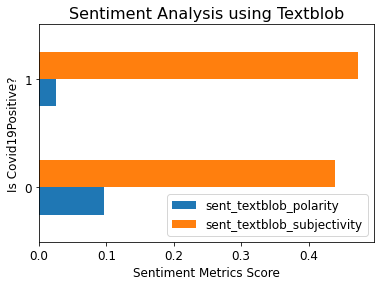

In [26]:
df.groupby('is_Covid19positive').mean()[['sent_textblob_polarity','sent_textblob_subjectivity']].plot(kind='barh')
plt.title('Sentiment Analysis using Textblob', fontsize=16)
plt.ylabel('Is Covid19Positive?',fontsize=12)
plt.xlabel('Sentiment Metrics Score',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
# 1 is real disaster and 0 is fake disaster

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

## Analyze Covid Sentiment with Time

In [13]:
import datetime, time

In [14]:
df.groupby('timestamp').head()[['sent_textblob_polarity','sent_textblob_subjectivity']]

,sent_textblob_polarity,sent_textblob_subjectivity
0,0.218615,0.419913
1,-0.600000,1.000000
2,-0.110000,0.668333
3,0.025492,0.376479
4,-0.243333,0.483333
...,...,...
33100,0.297619,0.685582
33101,0.242857,0.476984
33102,0.125694,0.600694
33103,0.049242,0.407576


### convert Timestamp to Year, Month, Day Format

In [15]:
date_time=[]
def timestamp_to_YrMoDa (dataF):
    for dt in dataF:
        dtime = time.strptime(dt,'%Y-%m-%d %H:%M:%S')
#         print(dt, dtime.tm_year, dtime.tm_mon, dtime.tm_mday)
        date_time.append([dtime.tm_year, dtime.tm_mon, dtime.tm_mday]) 
    return date_time

In [16]:
df[['yr','mo','da']] = timestamp_to_YrMoDa (df['timestamp'])

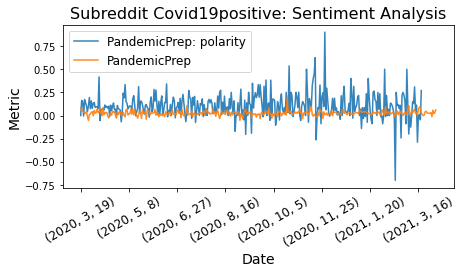

In [25]:

plt.figure(figsize=(7,3))
plt.title('Subreddit Covid19positive: Sentiment Analysis', fontsize = 16)

df[df['is_Covid19positive']==0].iloc[600:3000].groupby(['yr','mo','da']).mean().sort_values(by=['yr','mo','da'])['sent_textblob_polarity'].plot(alpha=0.9)
# df[df['is_Covid19positive']==0].iloc[3::].groupby(['yr','mo','da']).mean().sort_values(by=['yr','mo','da'])['sent_textblob_subjectivity'].plot(alpha=0.9)
# df_sentiment[df_sentiment['is_Covid19positive']==0].iloc[3::].groupby(['yr','mo','da']).mean().sort_values(by=['yr','mo','da'])['neg'].plot(alpha=0.7)
# df_sentiment[df_sentiment['is_Covid19positive']==0].iloc[3::].groupby(['yr','mo','da']).mean().sort_values(by=['yr','mo','da'])['pos'].plot(alpha=0.5)

df[df['is_Covid19positive']==1].iloc[100:22000].groupby(['yr','mo','da']).mean().sort_values(by=['yr','mo','da'])['sent_textblob_polarity'].plot(alpha=0.9)
# df[df['is_Covid19positive']==1].iloc[3::].groupby(['yr','mo','da']).mean().sort_values(by=['yr','mo','da'])['sent_textblob_subjectivity'].plot(alpha=0.9)
# df_sentiment[df_sentiment['is_Covid19positive']==1].iloc[3::].groupby(['yr','mo','da']).mean().sort_values(by=['yr','mo','da'])['neg'].plot(alpha=0.7)
# df_sentiment[df_sentiment['is_Covid19positive']==1].iloc[3::].groupby(['yr','mo','da']).mean().sort_values(by=['yr','mo','da'])['pos'].plot(alpha=0.5)

plt.legend(('PandemicPrep: polarity','PandemicPrep','',''),fontsize=12)
plt.ylabel('Metric', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(fontsize=12, rotation=30);
